# Tarea 7

In [1]:
import pandas as pd
import numpy as np

from dotenv import load_dotenv
import os

In [2]:
load_dotenv()
smm2_df = pd.read_csv(os.getenv("DATASET_STORE_FILE"))
columns_to_drop = ['data_id', 'name', 'description', 'gamestyle', 'theme', 'tag1', 'tag2', 'clear_condition', 'clear_condition_magnitude', 'weekly_likes', 'weekly_plays', 'uploader_pid', 'first_completer_pid', 'record_holder_pid']
smm2_df_clean = smm2_df.drop(columns_to_drop, axis=1)
smm2_df_clean['unique_clear_rate'] = np.minimum(smm2_df_clean['clears'] / smm2_df_clean['unique_players_and_versus'], 1.0)
smm2_df_clean.head(5)

,uploaded,created,difficulty,game_version,world_record,upload_time,upload_attempts,num_comments,timer,autoscroll_speed,clears,attempts,clear_rate,plays,versus_matches,coop_matches,likes,boos,unique_players_and_versus,unique_clear_rate
0,1621061069,1621092960,2,5,15283,15266,1,0,20,0,23,396,5.808081,45,0,0,3,2,38,0.605263
1,1621077412,1621080840,1,5,47217,62592,1,0,500,0,16,59,27.118644,26,0,0,1,1,24,0.666667
2,1621051239,1621033080,1,5,53933,57333,1,0,200,0,1,12,8.333333,4,0,0,0,0,4,0.250000
3,1621064079,1620710520,1,5,223387,198789,1,1,500,0,6,59,10.169492,22,0,0,1,0,21,0.285714
4,1621059182,1620229080,0,5,20533,32690,3,2,300,0,84,160,52.500000,95,2,0,13,4,86,0.976744


## Agrupamiento

In [3]:
from sklearn.preprocessing import StandardScaler
from archetypes import AA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

Using NumPy backend


In [4]:
scaler = StandardScaler()

# Nota: la muestra ya esta en un orden aleatorio, por lo que simplemente agarrar 
# los primeros x elementos no debería de generar un problema en el análisis
cl_X = scaler.fit_transform(smm2_df_clean.drop(columns=['difficulty']).head(1_000))
cl_y = smm2_df_clean[['difficulty']].head(1_000).values

extra_iter = 4
groups_iter = range(2, 16)

gps_scores = {}
gps_aas = {}
gps_ws = {}
for n_groups in groups_iter:
    gp_scores = []
    gp_aas = []
    gp_ws = []
    for _ in range(extra_iter):
        aa = AA(n_archetypes=n_groups)
        W = aa.fit_transform(cl_X)
        score = silhouette_score(cl_X, np.argmax(W, axis=1))
        gp_scores.append(score)
        gp_aas.append(aa)
        gp_ws.append(W)
    best_score_index = np.argmax(gp_scores)
    gps_scores[n_groups] = gp_scores[best_score_index]
    gps_aas[n_groups] = gp_aas[best_score_index]
    gps_ws[n_groups] = gp_ws[best_score_index]
    print(f'{n_groups} grupos, mejor resultado de {extra_iter} iteraciones: silueta={gp_scores[best_score_index]}')
    
best_k = max(gps_scores, key=gps_scores.get)
best_aa = gps_aas[best_k]
best_w = gps_ws[best_k]
print(f'Mejor Resultado:\nNumero de grupos: {best_k}\nSilueta={gps_scores[best_k]}')

2 grupos, mejor resultado de 4 iteraciones: silueta=0.9295720434955159
3 grupos, mejor resultado de 4 iteraciones: silueta=0.4866124785818975
4 grupos, mejor resultado de 4 iteraciones: silueta=0.19971302451086098
5 grupos, mejor resultado de 4 iteraciones: silueta=0.20855775271606508
6 grupos, mejor resultado de 4 iteraciones: silueta=0.14638384557375053
7 grupos, mejor resultado de 4 iteraciones: silueta=0.1402903944503458
8 grupos, mejor resultado de 4 iteraciones: silueta=0.1706653332258628
9 grupos, mejor resultado de 4 iteraciones: silueta=0.13991773272101024
10 grupos, mejor resultado de 4 iteraciones: silueta=0.08961805193621848
11 grupos, mejor resultado de 4 iteraciones: silueta=0.1412246712386634
12 grupos, mejor resultado de 4 iteraciones: silueta=0.10635179218818115
13 grupos, mejor resultado de 4 iteraciones: silueta=0.11626527922147661
14 grupos, mejor resultado de 4 iteraciones: silueta=0.08561292108005004
15 grupos, mejor resultado de 4 iteraciones: silueta=0.056212697

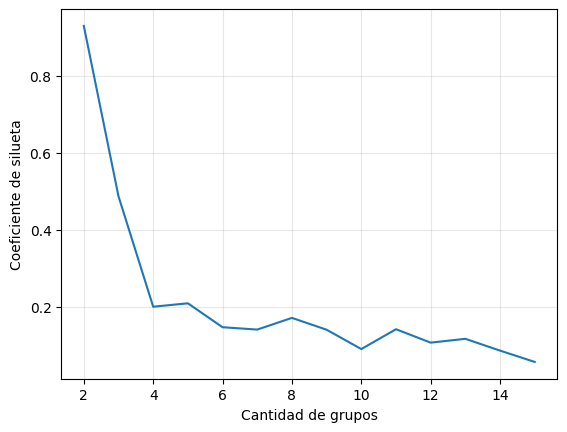

In [5]:
plt.plot(gps_scores.keys(), gps_scores.values())
plt.xlabel('Cantidad de grupos')
plt.ylabel('Coeficiente de silueta')
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
cl_X_unscaled = scaler.inverse_transform(cl_X)
arch_unscaled = scaler.inverse_transform(best_aa.archetypes_)
arch_unscaled

array([[1.62107331e+09, 1.62106939e+09, 5.00000000e+00, 7.33793504e+04,
        8.44505561e+04, 2.49256919e+00, 5.93695566e+01, 3.99504612e+02,
        9.95046124e-01, 8.98714854e+02, 1.50837304e+03, 6.29440478e+01,
        1.23354329e+03, 1.81272703e+03, 1.86847355e+02, 4.62044644e+02,
        2.25540396e+02, 2.92724150e+03, 5.21754544e-01],
       [1.62106450e+09, 1.61821186e+09, 4.93798485e+00, 3.34935422e+04,
        5.65861906e+04, 4.99867056e+00, 3.41264244e-01, 2.92147930e+02,
        7.50121993e-05, 1.19500996e+01, 7.43882679e+01, 3.49447371e+01,
        1.64855132e+01, 2.45326991e-01, 1.39380337e-01, 1.18137070e+00,
        9.17776588e-01, 1.22142707e+01, 6.35226159e-01]])

In [27]:
arch_unscaled_df = pd.DataFrame(arch_unscaled.T, index=smm2_df_clean.drop(columns=['difficulty']).columns, columns=[0, 1])
arch_unscaled_df.index = list(map(lambda c: f'\\texttt{{{str(c).replace('_', '\\_')}}}', arch_unscaled_df.index))
print(arch_unscaled_df.to_latex())

\begin{tabular}{lrr}
\toprule
 & 0 & 1 \\
\midrule
\texttt{uploaded} & 1621073311.996442 & 1621064499.760710 \\
\texttt{created} & 1621069388.385310 & 1618211859.649827 \\
\texttt{game\_version} & 5.000000 & 4.937985 \\
\texttt{world\_record} & 73379.350369 & 33493.542222 \\
\texttt{upload\_time} & 84450.556087 & 56586.190645 \\
\texttt{upload\_attempts} & 2.492569 & 4.998671 \\
\texttt{num\_comments} & 59.369557 & 0.341264 \\
\texttt{timer} & 399.504612 & 292.147930 \\
\texttt{autoscroll\_speed} & 0.995046 & 0.000075 \\
\texttt{clears} & 898.714854 & 11.950100 \\
\texttt{attempts} & 1508.373043 & 74.388268 \\
\texttt{clear\_rate} & 62.944048 & 34.944737 \\
\texttt{plays} & 1233.543289 & 16.485513 \\
\texttt{versus\_matches} & 1812.727027 & 0.245327 \\
\texttt{coop\_matches} & 186.847355 & 0.139380 \\
\texttt{likes} & 462.044644 & 1.181371 \\
\texttt{boos} & 225.540396 & 0.917777 \\
\texttt{unique\_players\_and\_versus} & 2927.241496 & 12.214271 \\
\texttt{unique\_clear\_rate} & 0.5217

In [7]:
X_all_scaled = scaler.transform(smm2_df_clean.drop(columns=['difficulty']))
archetypes_scaled = best_aa.archetypes_
distances_to_arch = euclidean_distances(X_all_scaled, archetypes_scaled)

smm2_df_with_clust = smm2_df_clean.copy()
for i in range(len(archetypes_scaled)):
    smm2_df_with_clust[f'dist_archetype_{i}'] = distances_to_arch[:, i]
    
smm2_df_with_clust.head(5)

,uploaded,created,difficulty,game_version,world_record,upload_time,upload_attempts,num_comments,timer,autoscroll_speed,...,clear_rate,plays,versus_matches,coop_matches,likes,boos,unique_players_and_versus,unique_clear_rate,dist_archetype_0,dist_archetype_1
0,1621061069,1621092960,2,5,15283,15266,1,0,20,0,...,5.808081,45,0,0,3,2,38,0.605263,45.744048,2.946845
1,1621077412,1621080840,1,5,47217,62592,1,0,500,0,...,27.118644,26,0,0,1,1,24,0.666667,45.872411,2.341242
2,1621051239,1621033080,1,5,53933,57333,1,0,200,0,...,8.333333,4,0,0,0,0,4,0.250000,46.260459,2.312056
3,1621064079,1620710520,1,5,223387,198789,1,1,500,0,...,10.169492,22,0,0,1,0,21,0.285714,46.026256,4.462358
4,1621059182,1620229080,0,5,20533,32690,3,2,300,0,...,52.500000,95,2,0,13,4,86,0.976744,44.655701,2.329682


## Selección de características

In [28]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector, ExhaustiveFeatureSelector

La calificación f1 esta hecha para la clasificación ya que esta utiliza la cantidad de verdaderos positivos, falsos positivos y falsos negativos para calcular su calificación la cual se define mediante:
$$
F1 = \frac{2 \times TP}{2 \times TP + FP + FN}
$$
Donde $TP$ es la cantidad de verdaderos positivos, $FP$ la de falsos positivos, y $FN$ la de falsos negativos.

In [9]:
scaler = StandardScaler()

smm2_x_df = smm2_df_with_clust.drop(columns=['difficulty'], axis=1)
smm2_y_df = smm2_df_with_clust['difficulty']

X = scaler.fit_transform(smm2_x_df)
y = smm2_y_df.values

In [10]:
selector = SelectPercentile(f_classif, percentile=50)
X_selected = selector.fit_transform(X, y)
columns_selected = smm2_x_df.columns[selector.get_support()]
columns_selected

Index(['world_record', 'upload_time', 'upload_attempts', 'timer', 'clears',
       'attempts', 'clear_rate', 'boos', 'unique_clear_rate',
       'dist_archetype_1'],
      dtype='object')

In [11]:
estimator = LogisticRegression(max_iter=1_000)
sfs = SequentialFeatureSelector(estimator=estimator, k_features=(1, len(X_selected[0])), forward=True, scoring='f1_weighted', cv=5)
sfs = sfs.fit(pd.DataFrame(X_selected, columns=columns_selected), y)

sfs_result = pd.DataFrame(sfs.get_metric_dict()).T
sfs_result = sfs_result.sort_values('avg_score', ascending = False)
sfs_result

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
3,"(2, 3, 6)","[0.8157102401508365, 0.823086222282004, 0.8296...",0.821842,"(upload_attempts, timer, clear_rate)",0.007629,0.005936,0.002968
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.8138823586243548, 0.8273921204521124, 0.826...",0.821597,"(world_record, upload_time, upload_attempts, t...",0.007666,0.005964,0.002982
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.8103490964844119, 0.8281278530951051, 0.830...",0.821495,"(world_record, upload_time, upload_attempts, t...",0.010715,0.008336,0.004168
4,"(2, 3, 6, 7)","[0.8151708782878556, 0.8252632315637707, 0.829...",0.821313,"(upload_attempts, timer, clear_rate, boos)",0.008429,0.006558,0.003279
5,"(0, 2, 3, 6, 7)","[0.8116270783336919, 0.8255086153682493, 0.830...",0.821139,"(world_record, upload_attempts, timer, clear_r...",0.008791,0.00684,0.00342
6,"(0, 1, 2, 3, 6, 7)","[0.808028369530122, 0.8297294053651098, 0.8296...",0.820701,"(world_record, upload_time, upload_attempts, t...",0.011648,0.009063,0.004531
7,"(0, 1, 2, 3, 4, 6, 7)","[0.8065202460213708, 0.8296496138916735, 0.829...",0.820509,"(world_record, upload_time, upload_attempts, t...",0.012209,0.009499,0.00475
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.8118245451645556, 0.8245111555154817, 0.823...",0.819776,"(world_record, upload_time, upload_attempts, t...",0.007389,0.005749,0.002875
2,"(2, 6)","[0.8115852098241817, 0.8214414627431167, 0.828...",0.818724,"(upload_attempts, clear_rate)",0.009081,0.007065,0.003533
1,"(6,)","[0.8058590066944497, 0.8125580272934431, 0.818...",0.809867,"(clear_rate,)",0.008789,0.006838,0.003419


In [72]:
def change_features(row):
    new_row = row.copy()
    new_row['feature_names'] = ', '.join(list(map(lambda x: f'\\texttt{{{x}}}', new_row['feature_names'])))
    return new_row

In [73]:
sfs_result_latex = sfs_result[['avg_score', 'feature_names']]
sfs_result_latex = sfs_result_latex.apply(change_features, axis=1)
# for i in range(2):
#     sfs_result_latex.at[i, 'feature_names'] = ', '.join(list(map(lambda x: f'\\texttt{{{x}}}', sfs_result_latex.iloc[i, 1])))
latex_str = sfs_result_latex.to_latex()
print(latex_str.replace('_', '\\_'))

\begin{tabular}{lrl}
\toprule
 & avg\_score & feature\_names \\
\midrule
3 & 0.821842 & \texttt{upload\_attempts}, \texttt{timer}, \texttt{clear\_rate} \\
9 & 0.821597 & \texttt{world\_record}, \texttt{upload\_time}, \texttt{upload\_attempts}, \texttt{timer}, \texttt{clears}, \texttt{attempts}, \texttt{clear\_rate}, \texttt{boos}, \texttt{unique\_clear\_rate} \\
8 & 0.821495 & \texttt{world\_record}, \texttt{upload\_time}, \texttt{upload\_attempts}, \texttt{timer}, \texttt{clears}, \texttt{attempts}, \texttt{clear\_rate}, \texttt{boos} \\
4 & 0.821313 & \texttt{upload\_attempts}, \texttt{timer}, \texttt{clear\_rate}, \texttt{boos} \\
5 & 0.821139 & \texttt{world\_record}, \texttt{upload\_attempts}, \texttt{timer}, \texttt{clear\_rate}, \texttt{boos} \\
6 & 0.820701 & \texttt{world\_record}, \texttt{upload\_time}, \texttt{upload\_attempts}, \texttt{timer}, \texttt{clear\_rate}, \texttt{boos} \\
7 & 0.820509 & \texttt{world\_record}, \texttt{upload\_time}, \texttt{upload\_attempts}, \tex

In [53]:
sfs_result_latex

,avg_score,feature_names
3,0.821842,"\texttt{upload_attempts}, \texttt{timer}, \tex..."
9,0.821597,"\texttt{\}, \texttt{t}, \texttt{e}, \texttt{x}..."
8,0.821495,"\texttt{\}, \texttt{t}, \texttt{e}, \texttt{x}..."
4,0.821313,"\texttt{world_record}, \texttt{upload_attempts..."
5,0.821139,"\texttt{world_record}, \texttt{upload_time}, \..."
6,0.820701,"\texttt{world_record}, \texttt{upload_time}, \..."
7,0.820509,"\texttt{world_record}, \texttt{upload_time}, \..."
10,0.819776,"(world_record, upload_time, upload_attempts, t..."
2,0.818724,"\texttt{world_record}, \texttt{upload_time}, \..."
1,0.809867,"\texttt{world_record}, \texttt{upload_time}, \..."


In [51]:
', '.join(list(map(lambda x: f'\\texttt{{{x}}}', sfs_result_latex.iloc[2, 1])))

'\\texttt{world_record}, \\texttt{upload_time}, \\texttt{upload_attempts}, \\texttt{timer}, \\texttt{clears}, \\texttt{attempts}, \\texttt{clear_rate}, \\texttt{boos}'

In [42]:
len(sfs_result_latex.index)

10

In [41]:
', '.join(list(map(lambda x: f'\\texttt{{{x}}}', sfs_result_latex.iloc[0, 1])))

'\\texttt{upload_attempts}, \\texttt{timer}, \\texttt{clear_rate}'

## Clasificación

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Los árboles de decisión clasifican datos dividiendo el espacio de atributos \(X\) en regiones \(R_m\).  
Cada región se asigna a una clase según la proporción de observaciones:

$$
p_{mk} = \frac{1}{N_m} \sum_{x_i \in R_m} I(y_i = k)
$$

La predicción elige la clase más frecuente en la región:

$$
k(m) = \arg\max_k p_{mk}
$$

Para evaluar la calidad de las divisiones se usan medidas de impureza como el índice Gini:

$$
\text{Gini}(R_m) = \sum_{k=1}^K p_{mk}(1 - p_{mk})
$$

In [13]:
smm2_df_train = smm2_df_clean.sample(frac=0.7)
smm2_df_test = smm2_df_clean.drop(smm2_df_train.index)

X_train = smm2_df_train[['upload_attempts', 'clear_rate']].values
y_train = smm2_df_train['difficulty'].values

X_test = smm2_df_test[['upload_attempts', 'clear_rate']].values
y_test = smm2_df_test['difficulty'].values

In [21]:
depth_iter = range(2, 25)

depth_scores = {}
depth_clfs = {}
for depth in depth_iter:
    dt_classifier = DecisionTreeClassifier(max_depth=depth)

    clf = make_pipeline(StandardScaler(), dt_classifier)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    depth_scores[depth] = score
    depth_clfs[depth] = clf
    
max_depth = max(depth_scores, key=depth_scores.get)
max_clf = depth_clfs[max_depth]
print(f'Mejor resultado:\nProfundidad máxima: {max_depth}\nCalificación={depth_scores[max_depth]}')

Mejor resultado:
Profundidad máxima: 6
Calificación=0.8336666666666667


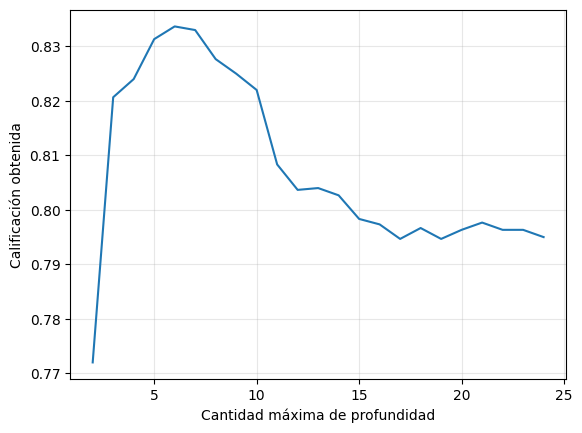

In [22]:
plt.plot(depth_scores.keys(), depth_scores.values())
plt.xlabel('Cantidad máxima de profundidad')
plt.ylabel('Calificación obtenida')
plt.grid(True, alpha=0.3)
plt.show()

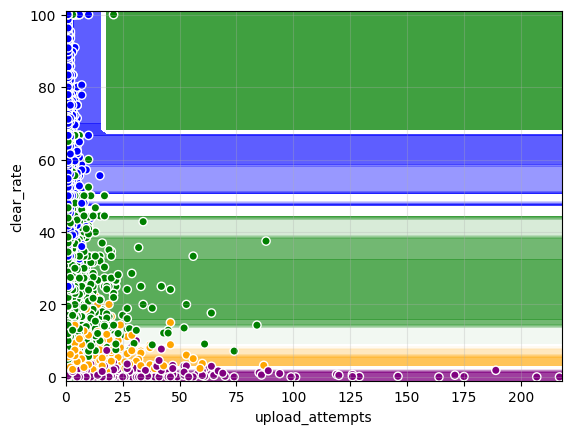

In [23]:
DecisionBoundaryDisplay.from_estimator(max_clf, np.concatenate((X_train, X_test), axis=0), multiclass_colors=['blue', 'green', 'orange', 'purple'], alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['blue', 'green', 'orange', 'purple']), edgecolors='w')
plt.xlabel('upload_attempts')
plt.ylabel('clear_rate')
plt.grid(True, alpha=0.3)
plt.show()

### Matriz discriminante

In [17]:
import seaborn as sns

In [18]:
smm2_dt_test_results = np.zeros([4, 4])
smm2_dt_predictions = max_clf.predict(X_test)
for pred, real in zip(smm2_dt_predictions, y_test):
    smm2_dt_test_results[real][pred] +=1
smm2_dt_test_results

array([[1002.,  160.,    0.,    0.],
       [ 138., 1116.,   36.,    0.],
       [   0.,  125.,  199.,   30.],
       [   0.,    2.,    8.,  184.]])

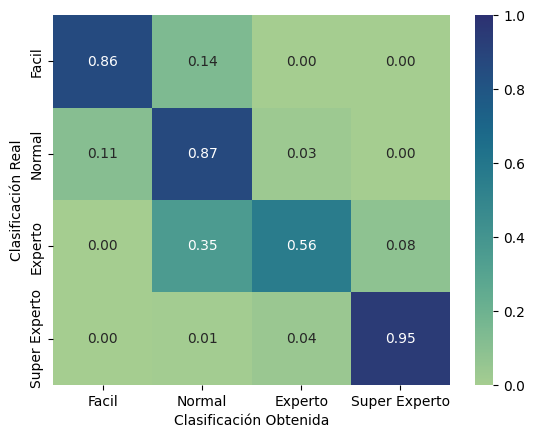

In [19]:
smm2_dt_test_results_df = pd.DataFrame(smm2_dt_test_results, columns=['Facil', 'Normal', 'Experto', 'Super Experto'], index=['Facil', 'Normal', 'Experto', 'Super Experto'])
smm2_dt_test_results_norm = smm2_dt_test_results_df.div(smm2_dt_test_results_df.sum(axis=1), axis=0)

sns.heatmap(smm2_dt_test_results_norm, cmap="crest", annot=True, fmt=".2f", vmin=0.0, vmax=1.0)
plt.xlabel('Clasificación Obtenida')
plt.ylabel('Clasificación Real')
plt.show()